# Contents <a id='back'></a>

* [Introduction](#intro)
* [1. Data Overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [2. Data Pre-Processing](#data_preprocessing)
    * [2.1 Rounding Average Trips](#round_avg_trips)
    * [2.2 Fixing Data Types](#data_types)
    * [2.3 Define Lower Bound and Upper Bound](#lower_upper_bound)
    * [2.4 Cleansing Outliers Data](#cleansing_outliers)
* [3. Exploratory Data Analysis](#eda)
    * [3.1 Identifying the top 10 drop-off locations based on average trips. Present the data in a graph.](#top10_dropoff)
    * [3.2 Identifying the top 10 company names based on the number of trips. Present the data in a graph.](#top10_companies)
* [4. Hypotheses Testing](#hypotheses)
     * [4.1 Hypothesis 1: The average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays.](#trip_duration_rainy_sat)
* [General Conclusion](#end)

# Introduction <a id='intro'></a>

In this project, I will discover patterns to understand passenger preferences and the impact of external factors on the rides of a ride-sharing company in Chicago.

Objective:

To understand passenger preferences and the impact of external factors on the rides. You will study the database, analyze data from competitors, and test hypotheses about the influence of weather on trip frequency.

Hyphoteses:
1. The average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays.


This project will comprise the following steps:

1. Data Overview
2. Data Preprocessing
3. Exploratory Data Analysis
4. Hypotheses Testing

[Back to Contents](#back)

## 1. Data Overview <a id='data_review'></a>

The steps to be performed are as follows:
1. Checking the number of rows and columns.
2. Checking for missing values.
3. Checking for duplicate data.
4. Checking statistical information in columns with numerical data types.
5. Checking values in columns with categorical data types.

[Back to Contents](#back)

In [1]:
# load library

# dataset
import pandas as pd, numpy as np

# statistical testing
import scipy.stats as st
from math import factorial

# data viz
import matplotlib.pyplot as plt, seaborn as sns

# ignore warning
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [34]:
# load dataset company
dataset_company = 'data/project_sql_result_01.csv'
df_company = pd.read_csv(dataset_company)

# load dataset dropoff
dataset_dropoff = 'data/project_sql_result_04.csv'
df_dropoff = pd.read_csv(dataset_dropoff)

# load dataset for hypotheses testing
dataset_trips = 'data/project_sql_result_07.csv'
df_trips = pd.read_csv(dataset_trips)

### 1.1 Data Exploration: company dataset

In [5]:
df_company.shape

(64, 2)

### Data Exploration: dropoff dataset

In [6]:
df_company.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [7]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
df_company.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [9]:
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [11]:
df_company.describe(include='object')

,company_name
count,64
unique,64
top,Flash Cab
freq,1


In [12]:
# check unique values
columns = ['company_name','trips_amount']
for column in columns:
    print(column)
    print((df_company[column].unique()))
    print()

company_name
['Flash Cab' 'Taxi Affiliation Services' 'Medallion Leasin' 'Yellow Cab'
 'Taxi Affiliation Service Yellow' 'Chicago Carriage Cab Corp'
 'City Service' 'Sun Taxi' 'Star North Management LLC'
 'Blue Ribbon Taxi Association Inc.' 'Choice Taxi Association'
 'Globe Taxi' 'Dispatch Taxi Affiliation' 'Nova Taxi Affiliation Llc'
 'Patriot Taxi Dba Peace Taxi Associat' 'Checker Taxi Affiliation'
 'Blue Diamond' 'Chicago Medallion Management' '24 Seven Taxi'
 'Chicago Medallion Leasing INC' 'Checker Taxi' 'American United'
 'Chicago Independents' 'KOAM Taxi Association' 'Chicago Taxicab'
 'Top Cab Affiliation' 'Gold Coast Taxi' 'Service Taxi Association'
 '5 Star Taxi' '303 Taxi' 'Setare Inc' 'American United Taxi Affiliation'
 'Leonard Cab Co' 'Metro Jet Taxi A' 'Norshore Cab'
 '6742 - 83735 Tasha ride inc' '3591 - 63480 Chuks Cab'
 '1469 - 64126 Omar Jada' '6743 - 78771 Luhak Corp'
 '0118 - 42111 Godfrey S.Awir' '6574 - Babylon Express Inc.'
 'Chicago Star Taxicab' '1085 - 72312 

In [13]:
# check duplicated data
df_company.duplicated().sum()

0

### 1.2 Data Exloration: dropoff dataset

In [14]:
df_dropoff.shape

(94, 2)

In [15]:
df_dropoff.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [16]:
df_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [17]:
df_dropoff.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [18]:
df_dropoff.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [19]:
df_dropoff.describe(include='object')

,dropoff_location_name
count,94
unique,94
top,Loop
freq,1


In [20]:
# check unique values
columns_dropoff = ['dropoff_location_name','average_trips']
for column in columns_dropoff:
    print(column)
    print((df_dropoff[column].unique()))
    print()

dropoff_location_name
['Loop' 'River North' 'Streeterville' 'West Loop' "O'Hare" 'Lake View'
 'Grant Park' 'Museum Campus' 'Gold Coast' 'Sheffield & DePaul'
 'Lincoln Park' 'East Village' 'Little Italy, UIC' 'Uptown'
 'Near South Side' 'Garfield Ridge' 'Logan Square' 'Edgewater' 'West Town'
 'Old Town' 'Rush & Division' 'North Center' 'Lincoln Square'
 'Rogers Park' 'West Ridge' 'Irving Park' 'Hyde Park' 'Avondale'
 'Wicker Park' 'Albany Park' 'United Center' 'Lower West Side' 'Douglas'
 'Portage Park' 'Humboldt Park' 'Norwood Park' 'Kenwood' 'Bridgeport'
 'Armour Square' 'Jefferson Park' 'Bucktown' 'North Park' 'Garfield Park'
 'Mckinley Park' 'Belmont Cragin' 'Boystown' 'Chinatown' 'Grand Boulevard'
 'Austin' 'Sauganash,Forest Glen' 'South Shore' 'Woodlawn'
 'Little Village' 'Jackson Park' 'North Lawndale' 'Dunning'
 'Ukrainian Village' 'Hermosa' 'Englewood' 'Chatham' 'New City'
 'Grand Crossing' 'Brighton Park' 'Andersonville' 'Oakland' 'Ashburn'
 'Washington Park' 'Auburn Gresham' 

In [21]:
# check duplicated data
df_dropoff.duplicated().sum()

0

### Conclusion for the 2 above datasets (company and dropoff):

1. There are no missing values in both datasets.
2. There are no duplicate values in both datasets.
3. Column names are consistent and all in lowercase.
4. In dropoff dataset, the `average_trips` column should have an integer data type because the number of trips should be an integer.
Therefore, it is necessary to change the data type of the `average_trips` column in the drop-off dataset, and the company dataset is ready for the Exploratory Data Analysis stage.

**Findings:**
1. In the statistical information of the `df_company` dataset, there is a wide range of values in the `trips_amount` column (value disparity). The minimum value is 2, while the maximum value is 19558.
2. In the statistical information of the `df_dropoff` dataset, there is a wide range of values in the `average_trips` column (value disparity). The minimum value is 1.8, while the maximum value is 10727.

### 1.3 Data Exploration: trips dataset

In [35]:
df_trips.shape

(1068, 3)

In [36]:
df_trips.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [37]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [38]:
# check missing values
df_trips.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [39]:
df_trips.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [40]:
df_trips.describe(include='object')

,start_ts,weather_conditions
count,1068,1068
unique,81,2
top,2017-11-11 10:00:00,Good
freq,48,888


In [41]:
# check duplicated data
df_trips.duplicated().sum()

197

In [42]:
# check data distribution in 'weather_conditions' column
df_trips['weather_conditions'].value_counts()

weather_conditions
Good    888
Bad     180
Name: count, dtype: int64

In [ ]:
# Checking the dates in the "start_ts" column to understand the distribution of the data.
pd.to_datetime(df_trips['start_ts']).dt.day.value_counts()

In [43]:
# Checking the months in the "start_ts" column to understand the distribution of the data.
pd.to_datetime(df_trips['start_ts']).dt.month.value_counts()

start_ts
11    1068
Name: count, dtype: int64

In [44]:
# Checking the years in the "start_ts" column to understand the distribution of the data.
pd.to_datetime(df_trips['start_ts']).dt.year.value_counts()

start_ts
2017    1068
Name: count, dtype: int64

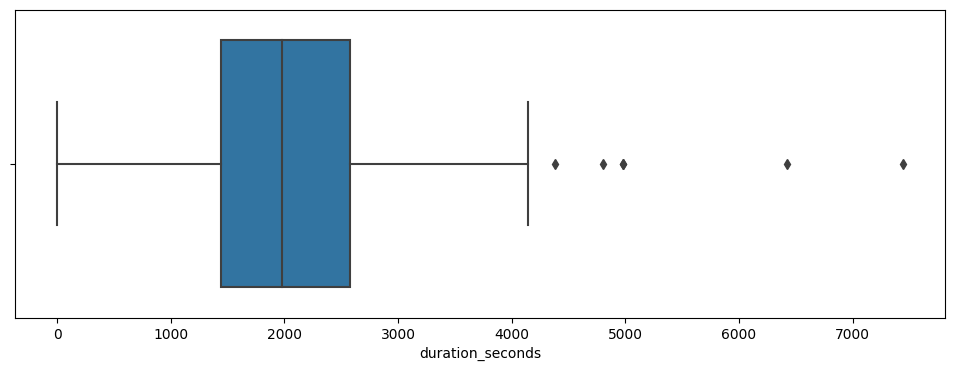

In [45]:
# Visualization of the "duration_seconds" column in the df_trips dataset.
plt.figure(figsize=(12,4))
sns.boxplot(x="duration_seconds", data=df_trips)
plt.show()

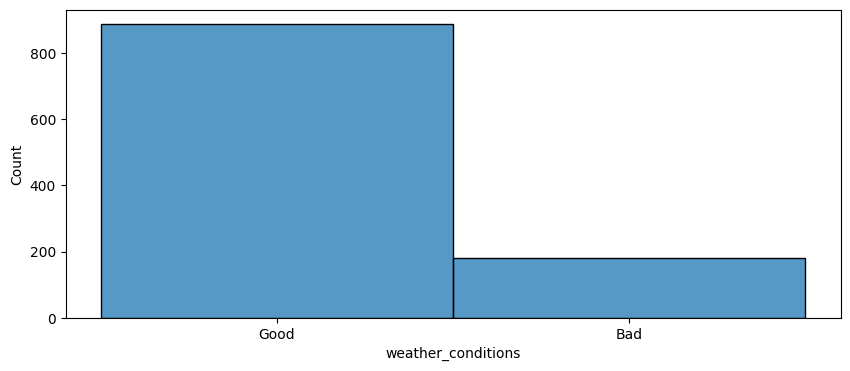

In [46]:
# Visualization of the "weather_conditions" column in the df_trips dataset
plt.figure (figsize=(10,4))
sns.histplot(df_trips['weather_conditions'])
plt.show()

**Conclusion for trips dataset**

1. There are no missing values.
2. There are 197 duplicate records.
3. The data type of the "start_ts" column is currently object. It should be changed to datetime.

Therefore, a data type change will be applied to the "start_ts" column.

Findings:
1. This dataset only contains data for four dates: the 4th, 11th, 18th, and 25th of November in 2017. All four dates fall on Saturdays.
2. There are some anomalies as there are instances with a duration_seconds value of 0 for trip data.
3. Outliers are present in the duration seconds column.

[Back to Contents](#back)

## 2 Data Preprocessing <a id='data_preprocessing'></a>

[Back to Contents](#back)

### 2.1 Rounding Average Trip <a id='round_avg_trip'></a>

#### dropoff dataset

In [22]:
# rounding up 'average_trips' column in dropoff dataset
df_dropoff['average_trips'] = df_dropoff['average_trips'].apply(np.ceil)

### 2.2 Fixing Data Types <a id='data_types'></a>

#### dropoff dataset

In [24]:
# Fixing data type of 'average_trips' column in dropoff dataset
df_dropoff['average_trips'] = df_dropoff['average_trips'].astype('int')
df_dropoff.dtypes

dropoff_location_name    object
average_trips             int64
dtype: object

In [25]:
df_dropoff.head(10)

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


### 2.3 Define lower bound and upper bound for column with outliers <a id='lower_upper_bound'></a>

In [47]:
# function to determine lower bound using whisker method
def lower_bound(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    return Q1 - (1.5*IQR)

In [48]:
# function to determine upper bound using whisker method
def upper_bound(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    return Q3 + (1.5*IQR)

#### trips dataset

In [49]:
# lower bound of 'duration_seconds'
duration_seconds_lower_bound = lower_bound(df_trips, 'duration_seconds')
duration_seconds_lower_bound

-274.375

In [50]:
# upper bound of 'duration_seconds'
duration_seconds_upper_bound = upper_bound(df_trips, 'duration_seconds')
duration_seconds_upper_bound

4292.625

In [51]:
# the number of outlier data in price duration_seconds
outliers_duration_seconds = df_trips['duration_seconds'][(df_trips['duration_seconds'] <= duration_seconds_lower_bound) | (df_trips['duration_seconds'] >= duration_seconds_upper_bound)]
print(outliers_duration_seconds)
print()
print('The number of outlier data:', len(outliers_duration_seconds))
print('percentage:', len(outliers_duration_seconds)/len(df_trips)*100)

79     4800.0
276    4980.0
354    7440.0
583    4980.0
619    6420.0
646    4380.0
Name: duration_seconds, dtype: float64

The number of outlier data: 6
percentage: 0.5617977528089888


### 2.4 Cleansing Outliers Data <a id='cleansing_outliers'></a>

due to the number of outlier data is small (0.56%), we will create a new dataset without outliers

In [52]:
df_trips_without_outliers = df_trips[~((df_trips['duration_seconds'] <= duration_seconds_lower_bound) | (df_trips['duration_seconds'] >= duration_seconds_upper_bound))]
df_trips_without_outliers

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


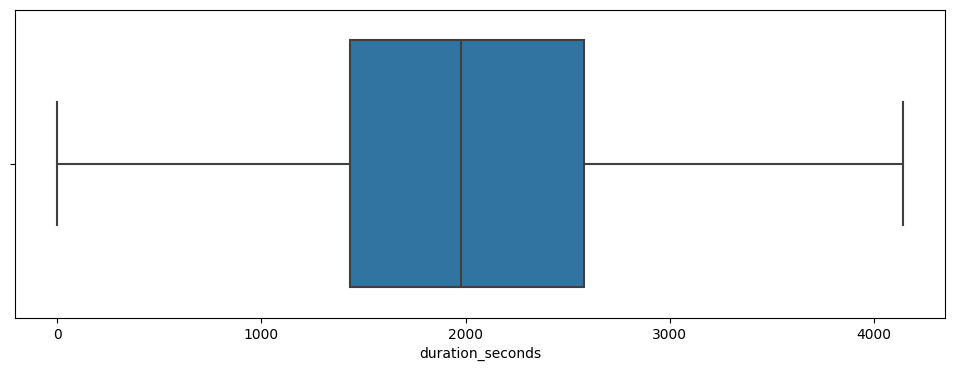

In [53]:
# Visualization of the "duration_seconds" column in the df_trips dataset, excluding outliers.
plt.figure(figsize=(12,4))
sns.boxplot(x="duration_seconds", data=df_trips_without_outliers)
plt.show()

### Conclusion of Data Pre-processing Stage

1. Rounded up the `average_trips` column in the drop-off dataset.
2. Changed the data type of the `average_trips` column in the drop-off dataset from 'float' to 'int64'.
3. cleansed the outlier data in trips dataset, 'duration_seconds' colmn

## 3. Exploratory Data Analysis <a id='eda'></a>

Things to be analyzed are:
1. Identifying the top 10 drop-off locations based on average trips. Present the data in a graph.
2. Identifying the top 10 company names based on the number of trips. Present the data in a graph.

[Back to Contents](#back)

### 3.1 Identifying the top 10 drop-off locations based on average trips. Present the data in a graph. <a id='top10_dropoff'></a>

In [26]:
top_10_dropoff = df_dropoff.sort_values('average_trips', ascending = False).head(10)
top_10_dropoff

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


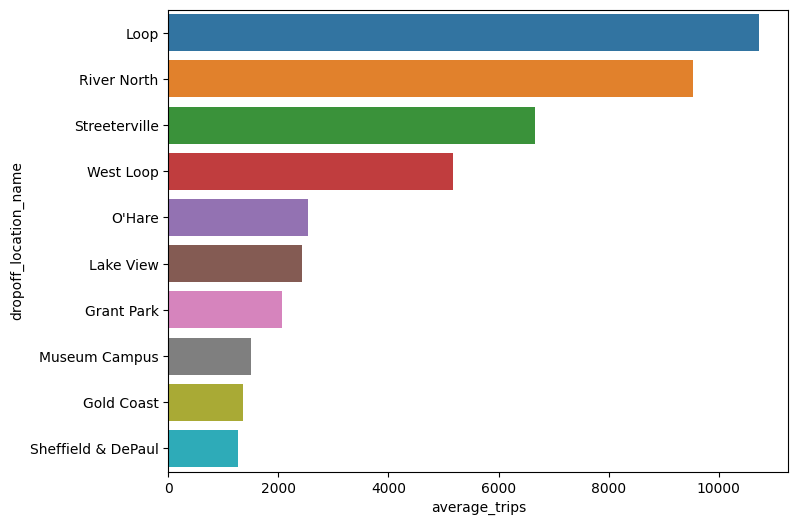

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(data = top_10_dropoff, y='dropoff_location_name', x='average_trips', orient='h')
plt.show()

**Conclusion**

Based on the data subset above, Loop is the top drop-off location with the highest average number of trips, which is 10728 trips.

There is a noticeable difference with Sheffield & DePaul, which is the 10th drop-off location with 1260 trips.

This indicates that Loop is the most preferred drop-off area, possibly having a high concentration of destinations or stores that passengers frequently travel to.

### 3.2 Identifying the top 10 company names based on the number of trips. Present the data in a graph. <a id='top10_companies'></a>

In [28]:
top_10_company = df_company.sort_values('trips_amount', ascending = False).head(10)
top_10_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


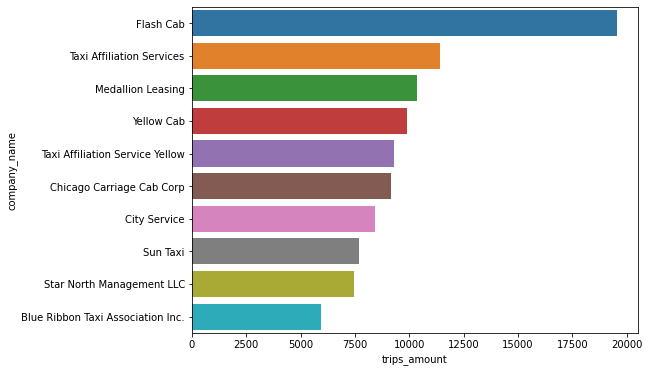

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(data = top_10_company, y='company_name', x='trips_amount', orient='h')
plt.show()

**Conclusion**

Based on the subset of data above, Flash Cab is the most trusted company by customers, with a total of 19558 trips.

About 30% below that, Blue Ribbon ranks 10th with a total of 5953 trips.

This indicates that Flash Cab has the highest number of trips among taxi companies, which might be due to having a large fleet and covering a wide range of areas.

## 4 Hypotheses Testing <a id='hypotheses'></a>

Testing will be conducted on the 'trips' dataset. The steps involved are:

1. Exploring the Dataset
2. Preprocessing the Data
3. Hypothesis Testing with the following formula:

    1. Determining the null hypothesis and alternative hypothesis.
    
        - The null hypothesis (H0) is a statement that states there is no significant effect or relationship between variables.
        
        - The alternative hypothesis (H1) is a statement that states there is a significant effect or relationship between variables.

    2. Determining the error rate (alpha). For a sample size above 500, an error rate of 5% is generally acceptable. Alpha represents how much chance is acceptable.
    3. Choosing the testing method (independent t-test, two-sided, one-sided).
    4. Preparing the dataset for testing.
    5. Feeding the dataset into the testing method.
    6. Obtaining a p-value (the probability that the observed result occurred by chance) > compare the p-value with alpha.
        - If p-value >= alpha: H0 is accepted.
        - If p-value < alpha: H0 is rejected.
    7. Drawing conclusions based on the comparison between the p-value and alpha.

    [Back to Contents](#back)

### Hypotheses 1: The average duration of trips from the Loop to O'Hare International Airport changes on rainy Saturdays. <a id='trip_duration_rainy_sat'></a>

Null Hypothesis (H0): The average travel duration from Loop to O'Hare International Airport DOES NOT CHANGE on rainy Saturdays or when weather conditions are "Bad."

Alternate Hypothesis (HA/H1): The average travel duration from Loop to O'Hare International Airport CHANGES on rainy Saturdays or when weather conditions are "Bad."

Alpha = 5%

Method = Independent T-test (Mean of 2 populations)

In [54]:
alpha = 0.05

In [55]:
# sample distribution
df_trips_without_outliers['weather_conditions'].value_counts()

weather_conditions
Good    883
Bad     179
Name: count, dtype: int64

In [56]:
# preparing dataset
df_trips_good = df_trips_without_outliers[df_trips_without_outliers['weather_conditions']=='Bad'].dropna().reset_index()
df_trips_bad = df_trips_without_outliers[df_trips_without_outliers['weather_conditions']=='Good'].dropna().reset_index()

In [57]:
df_trips_good.shape, df_trips_bad.shape

((179, 4), (883, 4))

In [60]:
# Levene Test
p_value_levene = st.levene(df_trips_good['duration_seconds'], df_trips_bad['duration_seconds']).pvalue
print('p value levene:', p_value_levene)
if p_value_levene < alpha:
    print('Reject H0: Variance of sample 1 is not equal to variance of sample 2')
else:
    print("Fail to reject H0: We don't have enough evidence to say that the difference of duration_seconds in between df_trips_good and df_trips_bad is statistically insignificant")

p value levene: 0.6196707782686355
Fail to reject H0: We don't have enough evidence to say that the difference of duration_seconds in between df_trips_good and df_trips_bad is statistically insignificant


In [61]:
# p-value
p_value = st.ttest_ind(df_trips_good['duration_seconds'], df_trips_bad['duration_seconds'], equal_var = True).pvalue
p_value

1.2430038032744411e-13

In [62]:
# conclusion
print(f'P-value: {p_value * 100:0.2f}%')
if p_value < alpha:
    print('Reject H0: There are statistically significant differences of durations_second in between df_trips_good and df_trips_bad')
else:
    print("Fail to reject H0: We don't have enough evidence to say that the difference of durations_second in between df_trips_good and df_trips_bad  is statistically insignificant")

P-value: 0.00%
Reject H0: There are statistically significant differences of durations_second in between df_trips_good and df_trips_bad


**Verdict**

The average travel duration from Loop to O'Hare International Airport CHANGES on rainy Saturdays or when weather conditions are "Bad."

This means that when weather conditions are "Bad," the travel duration is different.

**Insight**

Since the travel duration changes when weather conditions are "Bad," this can be anticipated by providing extended travel duration estimates.

# General Conclusion <a id='end'></a>

1. Loop is the drop-off point with the highest average number of trips, totaling 10,728 trips. This indicates that Loop is the most favored drop-off location, possibly because it's a destination for many passengers.

2. Flash Cab is the most trusted company among customers, with a total of 19,558 trips. This shows that Flash Cab has the highest number of trips, likely due to a large fleet of vehicles covering many areas.

3. The hypothesis is accepted, meaning that the average travel duration from Loop to O'Hare International Airport CHANGES on rainy Saturdays or when weather conditions are "Bad."

[Back to Contents](#back)